<a href="https://colab.research.google.com/github/diegol99/CasoEstudio_RRHH/blob/main/Avance_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Analítica aplicada en RRHH
* Integrantes:
1. Diego Luna Paternina
2. Santiago Gomez Berrio
3. Maria Clara Salazar Duque

##Lectura y carga de datos:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder


In [3]:
!git clone "https://github.com/diegol99/CasoEstudio_RRHH.git"

Cloning into 'CasoEstudio_RRHH'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 65 (delta 29), reused 12 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), 11.08 MiB | 2.16 MiB/s, done.


In [4]:
employee = "/content/CasoEstudio_RRHH/employee_survey_data.csv"
general= "/content/CasoEstudio_RRHH/general_data.csv"
in_time = "/content/CasoEstudio_RRHH/in_time.csv"
manager_survey= "/content/CasoEstudio_RRHH/manager_survey_data.csv"
out_time = "/content/CasoEstudio_RRHH/out_time.csv"
retirement= "/content/CasoEstudio_RRHH/retirement_info.csv"

In [5]:
##Columna en común EmployeeID
df_employee=pd.read_csv(employee,sep= None,engine="python")
df_generaldt=pd.read_csv(general,sep= None,engine="python")
df_managers = pd.read_csv(manager_survey,sep= None,engine="python")
df_retire= pd.read_csv(retirement,sep= None,engine="python")
##Tiempos
df_intime=pd.read_csv(in_time,sep= None,engine="python")
df_outime = pd.read_csv(out_time,sep= None,engine="python")

In [6]:
#convertir columnas de todos los df a miniscula
def convertirmin(df):
    df.columns = map(str.lower,df.columns)
convertirmin(df_employee)
convertirmin(df_generaldt)
convertirmin(df_managers)
convertirmin(df_retire)
convertirmin(df_intime)
convertirmin(df_outime)

In [7]:
df2= pd.merge(df_generaldt,df_employee,on="employeeid",how="inner")
df_final = pd.merge(df2,df_managers,on="employeeid",how="inner")
df_retir = pd.merge(df_final,df_retire,on="employeeid",how="right")

##Análisis exploratorio

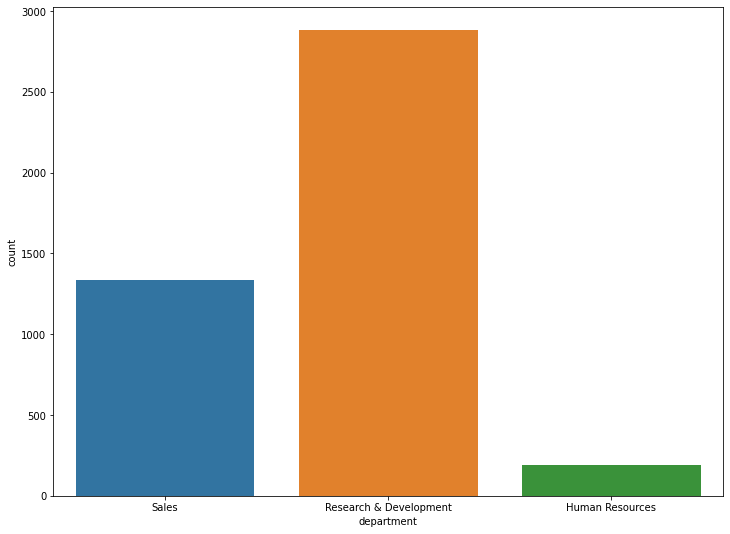

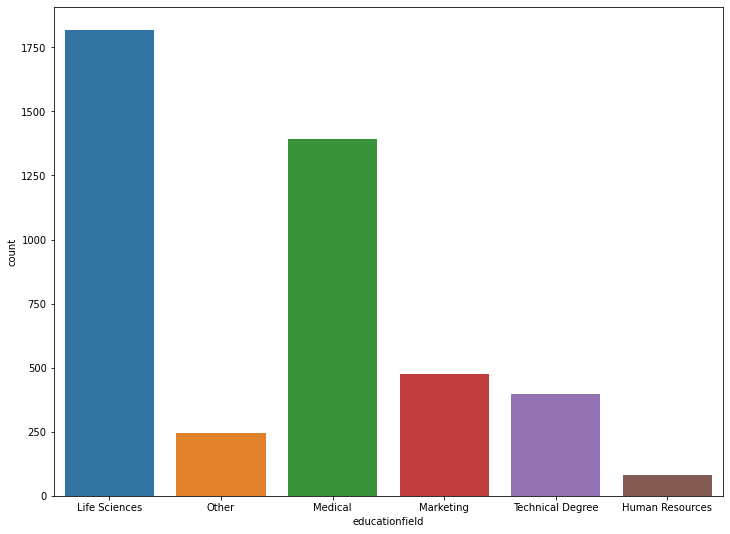

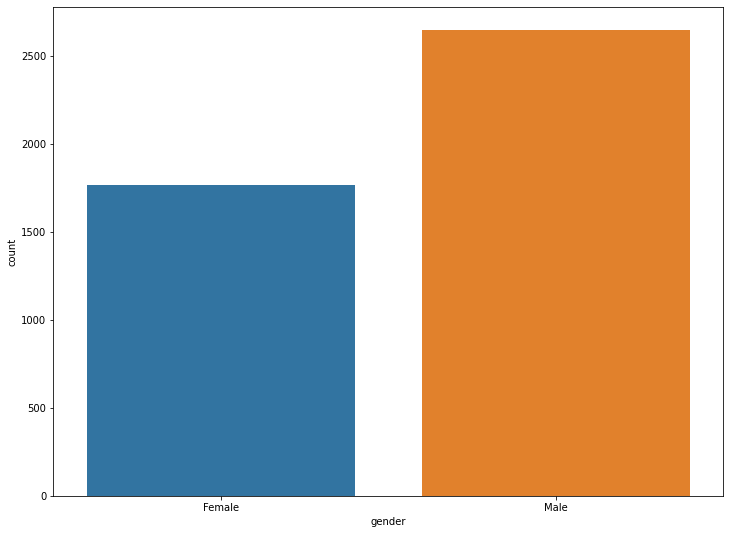

In [8]:
variables1 = df_final[["department","educationfield","gender"]]
for i in variables1:
    plt.figure(figsize= (12,9))
    sns.countplot(x= variables1[i])

In [9]:
##Información especifica 
##Departamento de recursos humanos es muy pequeño a comparación de los otros
import plotly.express as px
basepie= df_final.groupby(["department"])[["employeecount"]].count().sort_values('employeecount', ascending = False).reset_index()
empl = df_final["employeecount"].sum()

fig = px.pie(basepie, values = 'employeecount',names="department",hole= .5,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    annotations = [dict(text = str(empl), x=0.5, y = 0.5, font_size = 40, showarrow = False )])
fig.show()

<AxesSubplot:xlabel='department', ylabel='count'>

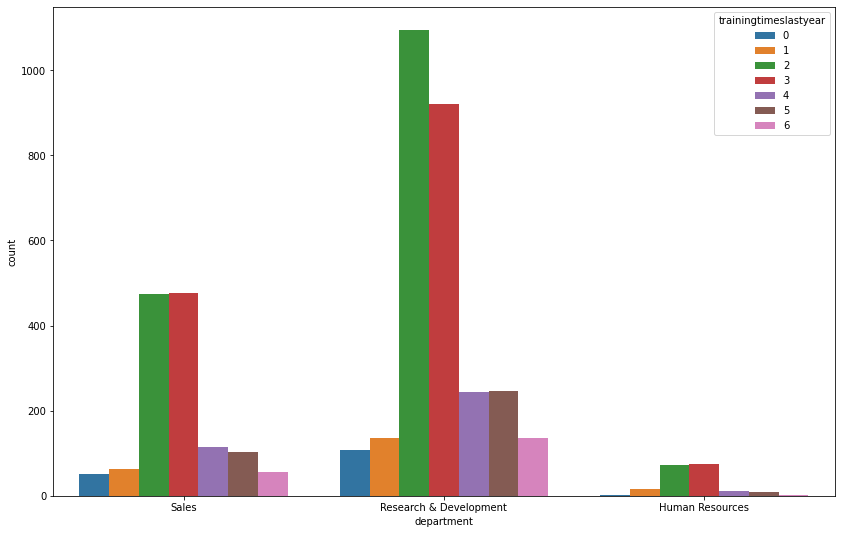

In [10]:
##Número de capacitaciones de los empleados que se encuentran en la empresa ----> df_final
plt.figure(figsize = (14,9))
sns.countplot(data=df_final,x="department",hue="trainingtimeslastyear")

<AxesSubplot:xlabel='department', ylabel='count'>

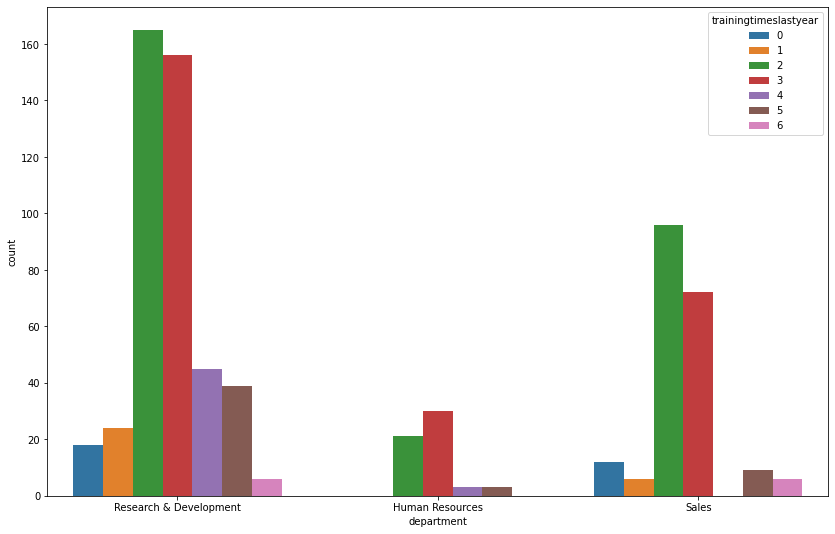

In [11]:
##Número de capacitaciones de los empleados que se encuentran en la empresa ----> df_retirados
plt.figure(figsize = (14,9))
sns.countplot(data=df_retir,x="department",hue="trainingtimeslastyear")

In [12]:
## Numero de capacitaciones de acuerdo a su satisfacción  df---->retirados
# Tabla de contingencia jobsatisfacion / capacitaciones
pd.crosstab(index=df_retir["jobsatisfaction"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
jobsatisfaction,,,,,,,,
1.0,15,6,75,68,15,18,0,197
2.0,6,21,45,48,9,9,0,138
3.0,6,3,87,90,12,9,12,219
4.0,3,0,75,51,12,15,0,156
All,30,30,282,257,48,51,12,710


**¿Cuál es el departamento con más empleados retirados según su nivel de trabajo?**

In [13]:
##Boxplot de las razones de retiro por departamento---> df retirados
fig = px.box(df_retir, x="resignationreason" , y='jobsatisfaction', color="department")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

**¿La edad de los empleados influye en los ascensos?**

In [14]:
# Tabla de contingencia aumento o promocion /edad
pd.crosstab(index=df_final["age"],
            columns=df_final["yearssincelastpromotion"], margins=True)

yearssincelastpromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,All
age,,,,,,,,,,,,,,,,,
18,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24
19,24,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27
20,18,9,6,0,0,0,0,0,0,0,0,0,0,0,0,0,33
21,9,18,12,0,0,0,0,0,0,0,0,0,0,0,0,0,39
22,18,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0,48
23,24,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42
24,33,27,12,6,0,0,0,0,0,0,0,0,0,0,0,0,78
25,33,30,12,0,0,3,0,0,0,0,0,0,0,0,0,0,78
26,45,39,9,3,3,6,0,12,0,0,0,0,0,0,0,0,117


In [15]:
# Tabla de contingencia años en la compañia / promocion
pd.crosstab(index=df_retir["yearssincelastpromotion"],
            columns=df_retir['yearsatcompany'], margins=True)

yearsatcompany,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,31,32,33,40,All
yearssincelastpromotion,,,,,,,,,,,,,,,,,,,,,
0,48,153,9,24,27,27,18,6,3,6,...,0,0,0,0,0,0,0,0,0,330
1,0,24,9,24,27,27,9,6,3,3,...,0,0,0,0,3,0,0,3,0,147
2,0,0,63,12,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,81
3,0,0,0,0,3,3,0,3,0,3,...,3,0,0,0,0,0,0,0,0,27
4,0,0,0,0,0,3,0,3,3,3,...,0,0,0,0,0,0,0,0,0,15
5,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,6
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,18
7,0,0,0,0,0,0,0,12,18,9,...,0,0,0,0,0,0,0,0,0,48
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


**¿Existe igualdad entre los salarios de hombres y mujeres?**

In [16]:
import plotly.express as px
df = df_final
fig = px.histogram(df, x="monthlyincome", color="gender")
fig.show()

In [17]:
###grafico años para ascendero ser jefe vs salario mensual
import plotly.express as px
df = df_final
fig = px.histogram(df, x="monthlyincome", color="yearswithcurrmanager")
fig.show()

In [18]:
#boxplot influencia de lo que ganan mensualmente vs su razón de salida por genero
fig = px.box(df_retir, x="resignationreason" , y='monthlyincome', color="gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

**¿El número de capacitaciones en el último año influye en el salario mensual?**

In [19]:
#histohgrama relacion de salario mensual vs el numero de capacitaciones al año
df = df_final
fig = px.histogram(df, x="monthlyincome", color="trainingtimeslastyear")
fig.show()

In [20]:
# Tabla de contingencia departamento / capacitaciones ---> Df retirados
pd.crosstab(index=df_retir["department"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
department,,,,,,,,
Human Resources,0,0,21,30,3,3,0,57
Research & Development,18,24,165,156,45,39,6,453
Sales,12,6,96,72,0,9,6,201
All,30,30,282,258,48,51,12,711


**¿Cuáles son los motivos por los que se retiraron los empleados de la empresa? ¿Esto tiene alguna relación con el número de capacitaciones que recibieron recientemente?**

In [21]:
# Tabla de contingencia Resignacion / capacitaciones
pd.crosstab(index=df_retir["resignationreason"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
resignationreason,,,,,,,,
Others,17,11,124,122,21,21,7,323
Salary,6,13,78,67,13,10,2,189
Stress,4,4,57,42,9,13,0,129
All,27,28,259,231,43,44,9,641


In [22]:
# Tabla de contingencia departamento/Eduacionfield ---> df_retirados
pd.crosstab(index=df_retir["department"],
            columns=df_retir["educationfield"], margins=True)

educationfield,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
department,,,,,,,
Human Resources,33,9,0,9,0,6,57
Research & Development,0,222,0,186,21,24,453
Sales,0,72,75,30,9,15,201
All,33,303,75,225,30,45,711


In [23]:
# Tabla de contingencia departamento/Eduacionfield ---> df_final
pd.crosstab(index=df_final["department"],
            columns=df_final["educationfield"], margins=True)

educationfield,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
department,,,,,,,
Human Resources,81,48,0,39,9,12,189
Research & Development,0,1320,0,1089,192,282,2883
Sales,0,450,477,264,45,102,1338
All,81,1818,477,1392,246,396,4410


<AxesSubplot:xlabel='educationfield'>

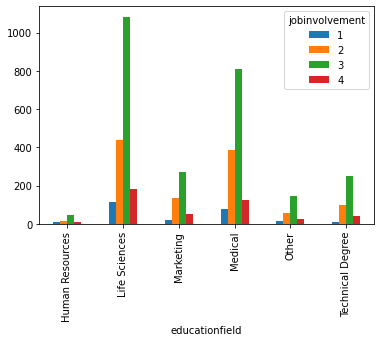

In [24]:
#Estudios de las personas y qué tanto están involucradas en el trabajo.
pd.crosstab(index=df_final['educationfield'],
            columns=df_final['jobinvolvement']).plot(kind='bar') 

In [25]:
####boxplot relacion de lo que ganan mensualmente vs su motivo de retiro por nivel de trabajo
fig = px.box(df_retir, x="resignationreason" , y='monthlyincome', color="joblevel")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

**¿Existe alguna relación entre el nivel de trabajo y el nivel de satisfacción?**

In [26]:
# Tabla de contingencia Nivel de trabajo/nivel de satisfación <----Df final
pd.crosstab(index=df_final["joblevel"],
            columns=df_final["jobsatisfaction"], margins=True)

jobsatisfaction,1.0,2.0,3.0,4.0,All
joblevel,,,,,
1,298,306,499,513,1616
2,311,294,501,493,1599
3,134,150,189,179,652
4,78,54,75,110,317
5,39,36,59,72,206
All,860,840,1323,1367,4390


**¿Cuál es el nivel de satisfacción en cada área?**

In [27]:
# Tabla de contingencia education field/nivel de satisfacion <----df final 
pd.crosstab(index=df_final["educationfield"],
            columns=df_final["jobsatisfaction"], margins=True)

jobsatisfaction,1.0,2.0,3.0,4.0,All
educationfield,,,,,
Human Resources,15,24,24,18,81
Life Sciences,360,318,528,599,1805
Marketing,78,87,144,168,477
Medical,271,285,438,394,1388
Other,59,51,69,65,244
Technical Degree,77,75,120,123,395
All,860,840,1323,1367,4390


In [28]:
##Boxplo departamento vs nivel de satisfacion por genro df final
fig = px.box(df_final, x='department' , y="jobsatisfaction", color="gender")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

**¿Las capacitaciones influyen en que los trabajadores asciendan de cargo?**

In [29]:
# Tabla de contingencia años dedsde la ultima promocion / capacitaciones
pd.crosstab(index=df_retir["yearssincelastpromotion"],
            columns=df_retir['trainingtimeslastyear'], margins=True)

trainingtimeslastyear,0,1,2,3,4,5,6,All
yearssincelastpromotion,,,,,,,,
0,15,15,144,108,9,27,12,330
1,3,3,60,60,12,9,0,147
2,0,3,18,36,18,6,0,81
3,6,0,9,6,0,6,0,27
4,3,3,3,6,0,0,0,15
5,0,0,0,6,0,0,0,6
6,3,0,9,6,0,0,0,18
7,0,3,21,15,6,3,0,48
9,0,0,3,6,3,0,0,12


##  Analisis Exploratorio: Df Retirados



1.   Revisar tiempo de capacitación. Esto puede afectar el rendimiento de los que se han retirado
2.   Buscar si las tareas asignadas al principio de la contratación son las mismas a la hora del retiro. Al poner trabajos adicionales, en diferente área y sin remuneración puede afectar.
3. Verificar los datos duplicados, atipicos.
4. Las personas que están asignando a los problemas,no tienen que ver con educación o area encargad



In [30]:
#dataset con solo los que se han retirado. Información completa
##Edad común de retiro ?
## Nivel de participación Jobinvolment
## Salario justificable? 
df_retir = pd.merge(df_final,df_retire,on="employeeid",how="right")
df_retir.columns = map(str.lower,df_retir.columns)

In [31]:
df_retir

,age,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,...,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,attrition,retirementdate,retirementtype,resignationreason
0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
1,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,0,1.0,3.0,1.0,3,4,Yes,20/07/2016,Resignation,Stress
2,47,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,...,9,1.0,2.0,2.0,2,3,Yes,08/11/2016,Resignation,Others
3,44,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,2,...,0,4.0,3.0,1.0,2,3,Yes,15/10/2016,Resignation,Others
4,26,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,3,...,2,1.0,2.0,3.0,2,3,Yes,08/02/2016,Resignation,Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,29,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,1,...,1,3.0,4.0,2.0,3,4,Yes,18/04/2016,Resignation,Salary
707,33,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,1,...,4,3.0,4.0,1.0,2,4,Yes,16/09/2016,Resignation,Others
708,33,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,2,...,7,1.0,1.0,4.0,3,3,Yes,24/05/2016,Resignation,Others
709,32,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,3,...,2,4.0,3.0,1.0,3,3,Yes,26/02/2016,Fired,NaN


In [32]:
df_retir.describe()

,age,distancefromhome,education,employeecount,employeeid,joblevel,monthlyincome,numcompaniesworked,percentsalaryhike,standardhours,...,totalworkingyears,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating
count,711.000000,711.000000,711.000000,711.0,711.000000,711.000000,711.000000,707.000000,711.000000,711.0,...,709.000000,711.000000,711.000000,711.000000,711.000000,706.000000,710.000000,707.000000,711.000000,711.000000
mean,33.607595,9.012658,2.877637,1.0,2191.767932,2.037975,61682.616034,2.936351,15.481013,8.0,...,8.255289,2.654008,5.130802,1.945148,2.852321,2.468839,2.470423,2.660537,2.704641,3.172996
std,9.675693,7.772368,1.014233,0.0,1270.136654,1.057485,44792.067695,2.678774,3.775289,0.0,...,7.164018,1.154834,5.941598,3.148633,3.138918,1.166807,1.115906,0.816377,0.761739,0.378510
min,18.000000,1.000000,1.000000,1.0,2.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,28.000000,2.000000,2.000000,1.0,1072.000000,1.000000,28440.000000,1.000000,12.000000,8.0,...,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,32.000000,7.000000,3.000000,1.0,2165.000000,2.000000,49080.000000,1.000000,14.000000,8.0,...,7.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,39.000000,15.000000,4.000000,1.0,3341.000000,2.000000,71040.000000,5.000000,18.000000,8.0,...,10.000000,3.000000,7.000000,2.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,58.000000,29.000000,5.000000,1.0,4403.000000,5.000000,198590.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,14.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [33]:
##Verificar esa clasificación de otras. Especificar que puede ser
df_retir["resignationreason"].value_counts()

Others    323
Salary    189
Stress    129
Name: resignationreason, dtype: int64

**¿Las edad de los empleados influye en su retiro?**

<AxesSubplot:xlabel='age'>

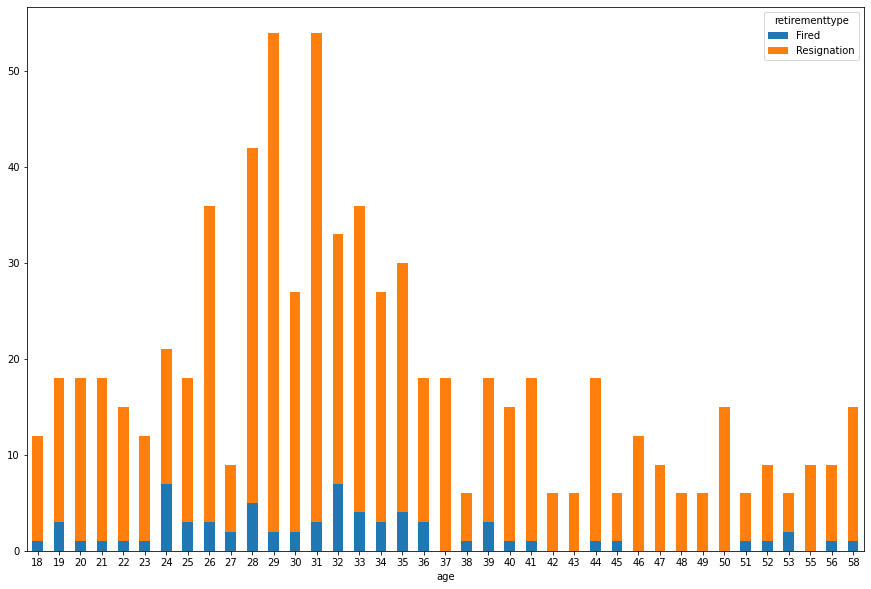

In [34]:
pd.crosstab(index=df_retir['age'],
            columns=df_retir['retirementtype']).plot(kind='bar',stacked = True, rot=0, figsize=(15, 10))


In [35]:
##Mayor cantidad de personas están de acuerdo(365)--->> Muy a la par de las que no(341)
df_retir["environmentsatisfaction"].value_counts()

1.0    213
3.0    186
4.0    179
2.0    128
Name: environmentsatisfaction, dtype: int64

In [36]:
df_retir["numcompaniesworked"].value_counts()

1.0    293
0.0     69
7.0     51
4.0     50
2.0     48
3.0     48
6.0     48
5.0     46
9.0     36
8.0     18
Name: numcompaniesworked, dtype: int64

In [37]:
##df con nulos
dfcon = df_retir.copy()
dfcon

,age,businesstravel,department,distancefromhome,education,educationfield,employeecount,employeeid,gender,joblevel,...,yearswithcurrmanager,environmentsatisfaction,jobsatisfaction,worklifebalance,jobinvolvement,performancerating,attrition,retirementdate,retirementtype,resignationreason
0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,4,3.0,2.0,4.0,2,4,Yes,15/10/2016,Resignation,Others
1,28,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,2,...,0,1.0,3.0,1.0,3,4,Yes,20/07/2016,Resignation,Stress
2,47,Non-Travel,Research & Development,1,1,Medical,1,14,Male,1,...,9,1.0,2.0,2.0,2,3,Yes,08/11/2016,Resignation,Others
3,44,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,2,...,0,4.0,3.0,1.0,2,3,Yes,15/10/2016,Resignation,Others
4,26,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,3,...,2,1.0,2.0,3.0,2,3,Yes,08/02/2016,Resignation,Salary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,29,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,1,...,1,3.0,4.0,2.0,3,4,Yes,18/04/2016,Resignation,Salary
707,33,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,1,...,4,3.0,4.0,1.0,2,4,Yes,16/09/2016,Resignation,Others
708,33,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,2,...,7,1.0,1.0,4.0,3,3,Yes,24/05/2016,Resignation,Others
709,32,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,3,...,2,4.0,3.0,1.0,3,3,Yes,26/02/2016,Fired,NaN


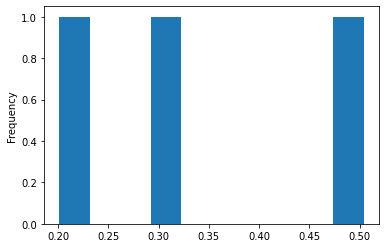

In [38]:
## Distribución de la variable resignationreason, la cual, es la que contiene más datos nulos
def distribucion_variable_categorica(col):
    df_retir[col].value_counts(ascending=True,normalize=True).tail(20).plot.hist()
    plt.show()
distribucion_variable_categorica('resignationreason')

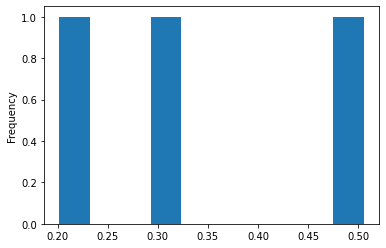

In [39]:
## Distribución de la variable resignationreason sin nulos
dfsin = df_retir.dropna()
def distribucion_variable_categorica1(col):
    dfsin[col].value_counts(normalize=True).tail(20).plot.hist()
    plt.show()
distribucion_variable_categorica1("resignationreason")

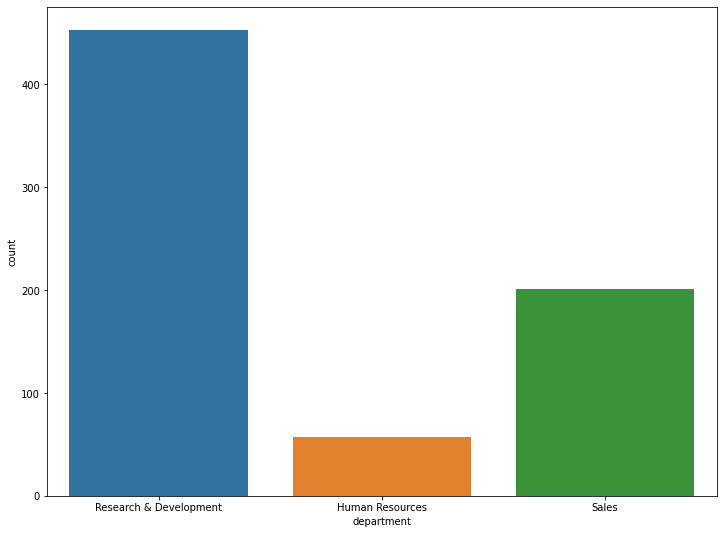

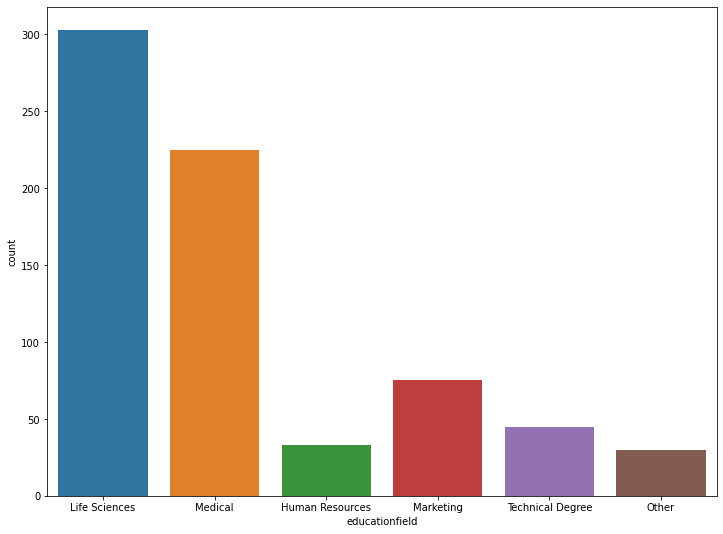

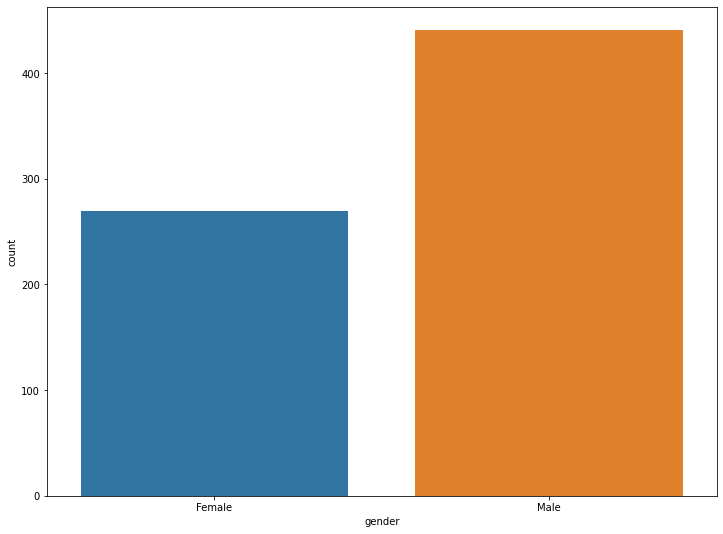

In [40]:
##No viajan mucho las personas que se retiraron
## El departamento de research & developmen es donde más se retiran, segundo ventas.
##Las personas que estudiaron ciencias de la vida y medicina son las que más se retiran
## se retiran más los hombres que las mujeres
##las personas abandonan el puesto m resignación
variables = dfcon[["department","educationfield","gender"]]
for i in variables:
    plt.figure(figsize= (12,9))
    sns.countplot(x= variables[i])

**¿Qué tanto estuvieron involucrados las personas retiradas en proyectos según sus estudios?**

<AxesSubplot:xlabel='educationfield'>

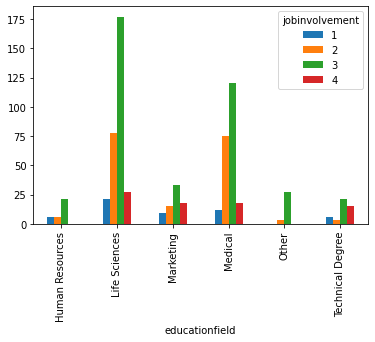

In [41]:
pd.crosstab(index=df_retir['educationfield'],
            columns=df_retir['jobinvolvement']).plot(kind='bar') 

**¿Qué tan satisfechos estan los empleados por departamento?**

<AxesSubplot:xlabel='department'>

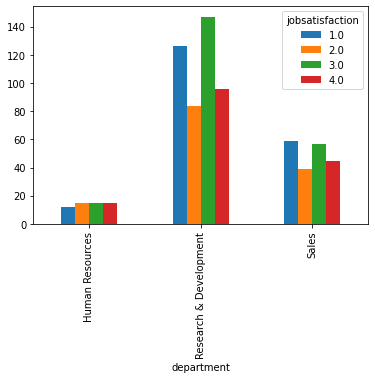

In [42]:
## Cantidad de personas segun su departamento y qué satisfechos están.
pd.crosstab(index=df_retir['department'],
            columns=df_retir['jobsatisfaction']).plot(kind='bar') 

<AxesSubplot:xlabel='department', ylabel='count'>

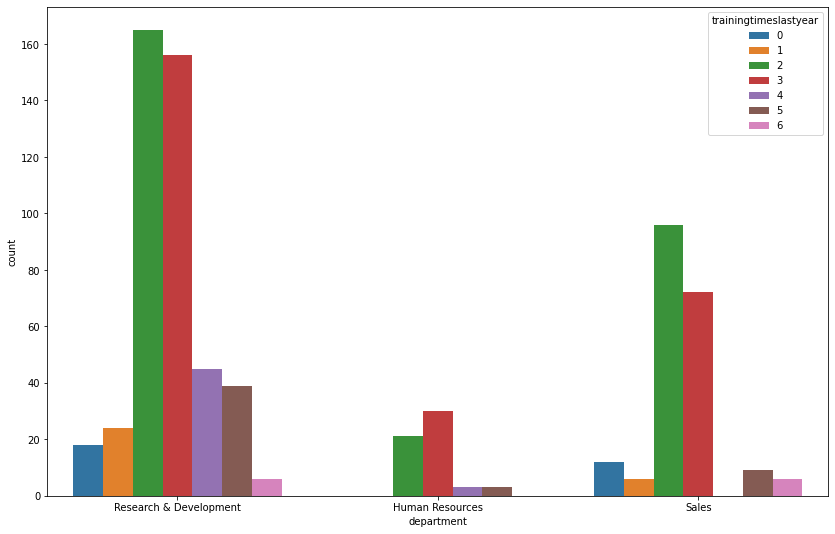

In [43]:
## De los retirados de los diferentes departamentos, se realizaron de 2 a 3 capacitaciones
plt.figure(figsize = (14,9))
sns.countplot(data=df_retir,x="department",hue="trainingtimeslastyear")

In [44]:
## Porcentaje de empleados por departament
basepie= df_retir.groupby(["department"])[["employeecount"]].count().sort_values('employeecount', ascending = False).reset_index()
empl1 = df_retir["employeecount"].sum()

fig = px.pie(basepie, values = 'employeecount',names="department",hole= .5,
                color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    annotations = [dict(text = str(empl1), x=0.5, y = 0.5, font_size = 40, showarrow = False )])
fig.show()

In [45]:
df_retir.columns

Index(['age', 'businesstravel', 'department', 'distancefromhome', 'education',
       'educationfield', 'employeecount', 'employeeid', 'gender', 'joblevel',
       'jobrole', 'maritalstatus', 'monthlyincome', 'numcompaniesworked',
       'over18', 'percentsalaryhike', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating', 'attrition', 'retirementdate',
       'retirementtype', 'resignationreason'],
      dtype='object')

In [46]:
df_retir['retirementdate'] = pd.to_datetime(df_retir['retirementdate']) # Convertir la fecha en el formato correcto
df_retir["retirementdate"] = df_retir["retirementdate"].dt.month
retfecha= df_retir.groupby(["retirementdate"])[["employeecount"]].count().reset_index()
fig = px.line(retfecha, x='retirementdate', y =['employeecount'], title = '<b>Evolución de retiros de los empleados<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    legend_title = 'Despidos:',
    xaxis_title = '<b>Fecha<b>',
    yaxis_title = '<b>Cantidad de casos<b>',
)

fig.show()

In [47]:
retfecha

,retirementdate,employeecount
0,1,72
1,2,61
2,3,62
3,4,55
4,5,69
5,6,63
6,7,77
7,8,59
8,9,46
9,10,61


## Selección de variables:

In [48]:
## Merge sobre Df_final(contiene todos los datos) y df_retire(retirados)
df_final1 = pd.merge(df_final,df_retire,on='employeeid',how= 'outer')

In [49]:
## Se reemplaza los nulos con una categoria : No aplica
dic2 = ['atrittion','retirementdate','retirementtype','resignationreason']
for i in dic2:
    df_final1.replace(np.nan,'No Aplica',inplace=True)

In [50]:
##Se reemplaza la categoria despedidos con "Otro motivo"
df_final1["retirementtype"].replace('Fired','Otro motivo',inplace=True)

In [51]:
##Para efectos del modelo, estas de cambian debido a que solo se van a predecir las renuncias.
df_final1["retirementtype"].value_counts()

No Aplica      3699
Resignation     641
Otro motivo      70
Name: retirementtype, dtype: int64

In [52]:
##Dejamos por fuera a los que despidieron porque nuestro modelo se basa en los RETIRADOS
df_final1["salaryhike"] = df_final1['percentsalaryhike'].apply(lambda x: x/100)
df_final1["renuncia"] = df_final1["retirementtype"].apply(lambda x: 0 if x != 'Resignation' else 1)

In [53]:
## Se reemplazan los nulos con ceros
fill = ["numcompaniesworked","totalworkingyears"]
for i in fill:
    df_final1[i].replace(np.nan,0,inplace= True)

In [54]:
## Se eliminan variables que creemos que no aportan al modelo
df_final1.drop(columns=['employeecount','standardhours','over18','percentsalaryhike','retirementdate','retirementtype','resignationreason'], axis= 1,inplace=True)

In [55]:
##Rellenar aleatoriamente los nulos entre minimo y media
df_final1["environmentsatisfaction"]= df_final1["environmentsatisfaction"].apply(lambda x: x if not pd.isnull(x) else np.random.choice(range(int(df_final1['environmentsatisfaction'].min()),int(df_final1['environmentsatisfaction'].mean()))))
df_final1["jobsatisfaction"]= df_final1["jobsatisfaction"].apply(lambda x: x if not pd.isnull(x) else np.random.choice(range(int(df_final1['jobsatisfaction'].min()),int(df_final1['jobsatisfaction'].mean()))))
df_final1["worklifebalance"]= df_final1["worklifebalance"].apply(lambda x: x if not pd.isnull(x) else np.random.choice(range(int(df_final1['worklifebalance'].min()),int(df_final1['worklifebalance'].mean()))))

<AxesSubplot:>

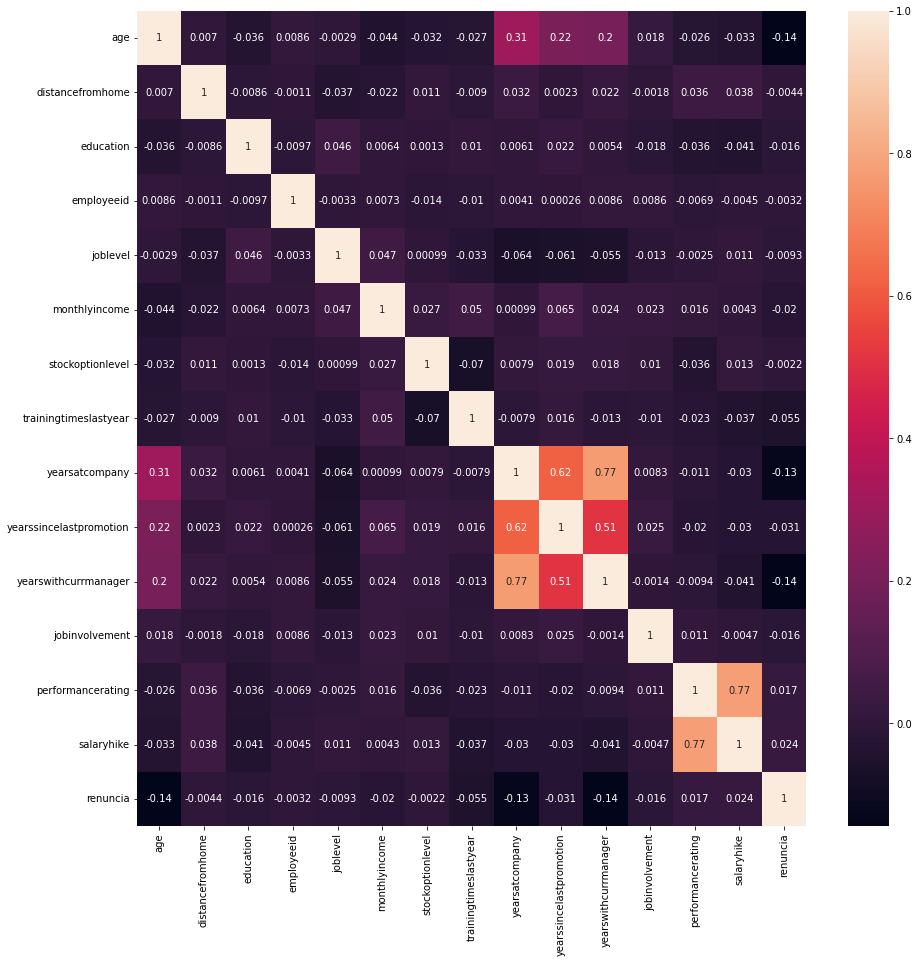

In [56]:
plt.figure(figsize =(15,15))
sns.heatmap(df_final1.corr(),annot= True)

In [57]:
##Correlaciones
x = df_final1.corr().unstack().sort_values()
x[x<1].tail(10)

age                      yearsatcompany             0.311309
yearsatcompany           age                        0.311309
yearssincelastpromotion  yearswithcurrmanager       0.510224
yearswithcurrmanager     yearssincelastpromotion    0.510224
yearsatcompany           yearssincelastpromotion    0.618409
yearssincelastpromotion  yearsatcompany             0.618409
yearsatcompany           yearswithcurrmanager       0.769212
yearswithcurrmanager     yearsatcompany             0.769212
salaryhike               performancerating          0.773550
performancerating        salaryhike                 0.773550
dtype: float64

In [58]:
##A raíz de la selección de variables, se convierten en dummies aquellas que son categoricas.
dummies= pd.get_dummies(df_final1, columns=["businesstravel","department","educationfield","gender","jobrole","maritalstatus","attrition"])
dummies

,age,distancefromhome,education,employeeid,joblevel,monthlyincome,numcompaniesworked,stockoptionlevel,totalworkingyears,trainingtimeslastyear,...,jobrole_Manufacturing Director,jobrole_Research Director,jobrole_Research Scientist,jobrole_Sales Executive,jobrole_Sales Representative,maritalstatus_Divorced,maritalstatus_Married,maritalstatus_Single,attrition_No Aplica,attrition_Yes
0,51,6,2,1,1,131160,1.0,0,1.0,6,...,0,0,0,0,0,0,1,0,1,0
1,31,10,1,2,1,41890,0.0,1,6.0,3,...,0,0,1,0,0,0,0,1,0,1
2,32,17,4,3,4,193280,1.0,3,5.0,2,...,0,0,0,1,0,0,1,0,1,0
3,38,2,5,4,3,83210,3.0,3,13.0,5,...,0,0,0,0,0,0,1,0,1,0
4,32,10,1,5,1,23420,4.0,2,9.0,2,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,4406,1,60290,3.0,1,10.0,5,...,0,0,1,0,0,0,0,1,1,0
4406,29,2,4,4407,1,26790,2.0,0,10.0,2,...,0,0,0,0,0,1,0,0,1,0
4407,25,25,2,4408,2,37020,0.0,0,5.0,4,...,0,0,0,1,0,0,1,0,1,0
4408,42,18,2,4409,1,23980,0.0,1,10.0,2,...,0,0,0,0,0,1,0,0,1,0


In [59]:
## se observa que dentro de los dummies, existe una categoria "No aplica". Esta se reemplaza con cero
dummies.replace("No Aplica",0,inplace= True)

In [60]:
##División de los datos
X= dummies.drop(["renuncia"],axis = 1)
y = dummies.renuncia

In [61]:
escalador = MinMaxScaler()
dReescalados = escalador.fit_transform(X)
#set_printoptions(precision=2)
print(dReescalados)

[[0.78571429 0.17857143 0.25       ... 0.         1.         0.        ]
 [0.30952381 0.32142857 0.         ... 1.         0.         1.        ]
 [0.33333333 0.57142857 0.75       ... 0.         1.         0.        ]
 ...
 [0.16666667 0.85714286 0.25       ... 0.         1.         0.        ]
 [0.57142857 0.60714286 0.25       ... 0.         1.         0.        ]
 [0.52380952 0.96428571 0.5        ... 0.         1.         0.        ]]


In [62]:
escalador = StandardScaler().fit(X)
dEstandarizados = escalador.transform(X)
dEstandarizados

array([[ 1.54136892, -0.39393818, -0.89168825, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       [-0.64866811,  0.09963874, -1.86842575, ...,  1.45864991,
        -2.28090588,  2.28090588],
       [-0.53916626,  0.96339837,  1.06178675, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       ...,
       [-1.30567922,  1.95055222, -0.89168825, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       [ 0.55585225,  1.0867926 , -0.89168825, ..., -0.68556546,
         0.4384223 , -0.4384223 ],
       [ 0.33684855,  2.32073492,  0.08504925, ..., -0.68556546,
         0.4384223 , -0.4384223 ]])

In [63]:
escalador = Normalizer().fit(X)
dEstandarizados = escalador.transform(X)
dEstandarizados

array([[3.88838029e-04, 4.57456505e-05, 1.52485502e-05, ...,
        0.00000000e+00, 7.62427509e-06, 0.00000000e+00],
       [7.40033165e-04, 2.38720376e-04, 2.38720376e-05, ...,
        2.38720376e-05, 0.00000000e+00, 2.38720376e-05],
       [1.65562911e-04, 8.79552963e-05, 2.06953638e-05, ...,
        0.00000000e+00, 5.17384096e-06, 0.00000000e+00],
       ...,
       [6.70573396e-04, 6.70573396e-04, 5.36458717e-05, ...,
        0.00000000e+00, 2.68229359e-05, 0.00000000e+00],
       [1.72258195e-03, 7.38249407e-04, 8.20277119e-05, ...,
        0.00000000e+00, 4.10138560e-05, 0.00000000e+00],
       [7.29160926e-04, 5.10412648e-04, 5.46870695e-05, ...,
        0.00000000e+00, 1.82290232e-05, 0.00000000e+00]])

In [64]:
#Crear un modelo de selección
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

est_prueba = SelectKBest(score_func=f_classif, k='all')
est_ajustado = est_prueba.fit(X,y)

#Muestro el desempeño de los features basado en el valor F
set_printoptions(precision=3, suppress= True)
est_ajustado.scores_
#features = est_ajustado.transform(dCod)
#features
##Se seleccionan los puntajes > 20: age,stockoptionlevel,traininglastyears,yearssincelastpromotion,yearwithcurmanager,enviromentsatisfaction,
##salaryhike,businesstravel,department,attrittion,maritalstatus

array([   90.578,     0.085,     1.104,     0.044,     0.381,     1.715,
          11.026,     0.021,   113.778,    13.177,    73.639,     4.247,
          94.194,    35.001,    38.878,    14.176,     1.154,     1.253,
           2.438,    22.337,    52.935,     9.548,    31.527,     0.814,
           2.346,    37.728,     0.716,     0.103,     0.24 ,     2.085,
           4.108,     0.222,     0.222,     0.843,     0.722,     0.053,
           2.539,     7.6  ,     7.076,     1.841,     2.028,     0.602,
          28.255,    32.712,   120.097, 33856.91 , 33856.91 ])

In [66]:
dummies.columns

Index(['age', 'distancefromhome', 'education', 'employeeid', 'joblevel',
       'monthlyincome', 'numcompaniesworked', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'environmentsatisfaction', 'jobsatisfaction', 'worklifebalance',
       'jobinvolvement', 'performancerating', 'salaryhike', 'renuncia',
       'businesstravel_Non-Travel', 'businesstravel_Travel_Frequently',
       'businesstravel_Travel_Rarely', 'department_Human Resources',
       'department_Research & Development', 'department_Sales',
       'educationfield_Human Resources', 'educationfield_Life Sciences',
       'educationfield_Marketing', 'educationfield_Medical',
       'educationfield_Other', 'educationfield_Technical Degree',
       'gender_Female', 'gender_Male', 'jobrole_Healthcare Representative',
       'jobrole_Human Resources', 'jobrole_Laboratory Technician',
       'jobrole_Manager', 'jobrole_Manuf

In [68]:
df_modelo = df_final1[["age","employeeid","stockoptionlevel","trainingtimeslastyear","yearssincelastpromotion",
                       "yearswithcurrmanager","environmentsatisfaction","salaryhike","businesstravel",
                       "department","attrition","maritalstatus"]]
df_modelo.replace("No Aplica",0,inplace= True)

## Random Forest
Fuente: https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
# Para poder modelar
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#para visualización
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
test_size=0.33
seed=6
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,random_state=seed)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
modelo_forest= rf.fit(X_train, Y_train)

In [ ]:
y_pred = rf.predict(X_test) #predicción

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy) #el modelo se ajusta en un 97%

Accuracy: 0.9711538461538461


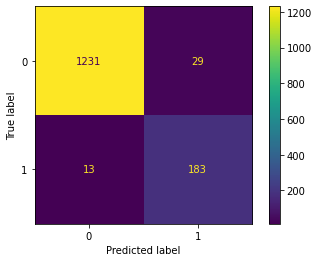

In [ ]:
matrix = confusion_matrix(Y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

In [ ]:
reporte = classification_report(Y_test,y_pred) #ramdom_forest
print(reporte)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1260
           1       0.86      0.93      0.90       196

    accuracy                           0.97      1456
   macro avg       0.93      0.96      0.94      1456
weighted avg       0.97      0.97      0.97      1456



In [ ]:
param_dist = {'n_estimators': randint(50,500), #esto es para conocer los mejores hiperparametros
              'max_depth': randint(1,20)}

# Creaar un random forest classifier
rf = RandomForestClassifier()

# Usar un random search para encontrar los mejores hiperparametros
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Ajustar el random search object a los datos
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f18e031d880>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f18e8d73f70>})

In [ ]:
# Crear una variable para el mejor modelo
best_rf = rand_search.best_estimator_

# imprimir los mejores hiperparametros
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 236}


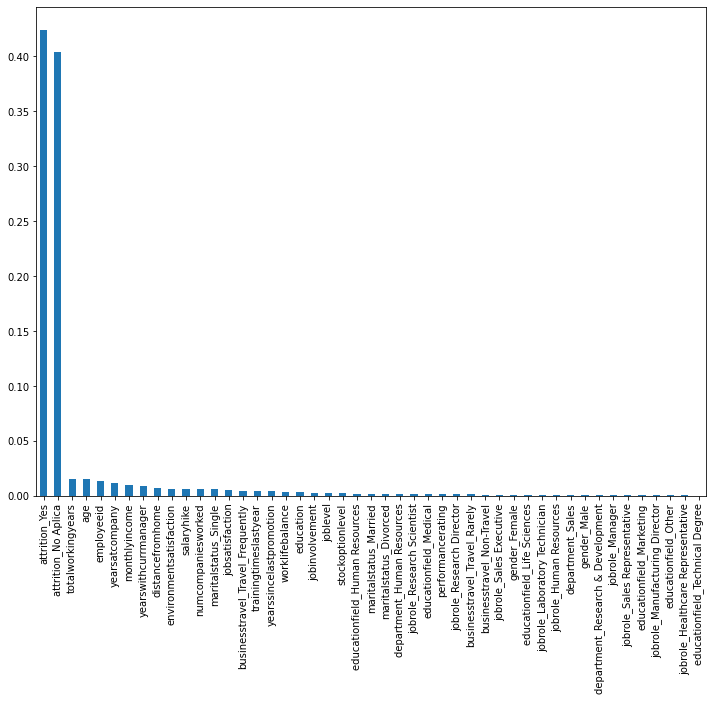

In [ ]:
# Crear una serie que contenga la importancia de las características del modelo y nombres de características de los datos de entrenamiento
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Trazar un gráfico de barras simple
plt.figure(figsize= (12,9))
feature_importances.plot.bar();

## Neural Network:

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
X, y = make_classification(n_samples=4000, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
regr = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test[:2])
regr.score(X_test, y_test)

0.967

In [ ]:
#Evaluar con K Fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfld = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = regr
res = cross_val_score(modelo, X, y, cv=kfld)
mean= res.mean()*100
print(res)
print(mean)

[0.958 0.943 0.955 0.97  0.965 0.973 0.968 0.935 0.975 0.958]
95.975


In [ ]:
#Evaluar con Area under ROC
kfold = KFold(n_splits=10, random_state=6, shuffle=True)
modelo = regr
score='roc_auc'
resultado = cross_val_score(modelo, X, y, cv=kfold, scoring=score)
cl2= resultado.mean()*100
cl2

98.11423371481673

## Regresión Logística:

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
model = linear_model.LogisticRegression()
model.fit(X,y)
model.score(X,y)

0.955

In [ ]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10,shuffle = False, random_state=None)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.956250 (0.010915)


In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.93875


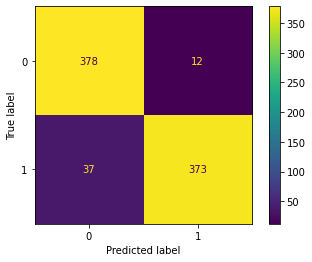

In [ ]:
matrix = confusion_matrix(Y_validation, predictions)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()

In [ ]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       390
           1       0.97      0.91      0.94       410

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



## SVC linear

In [176]:
dum_modelo = pd.get_dummies(df_modelo)
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(dum_modelo)
data = pd.DataFrame(data_scaled, columns=dum_modelo.columns)

In [177]:

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [178]:
x, y = make_classification(n_samples=2100, n_features=10, 
                           n_classes=2, 
                           n_clusters_per_class=1)

In [179]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

In [180]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC()


LinearSVC()

In [181]:
lsvc.fit(xtrain, ytrain)
score = lsvc.score(xtrain, ytrain)
print("Score: ", score)

Score:  0.9142857142857143


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [182]:
cv_scores = cross_val_score(lsvc, xtrain, ytrain, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



CV average score: 0.91


**Predicting and accuracy check**

In [183]:
ypred = lsvc.predict(xtest)

cm = confusion_matrix(ytest, ypred)
print(cm)

[[211   2]
 [ 31 176]]


In [184]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       213
           1       0.99      0.85      0.91       207

    accuracy                           0.92       420
   macro avg       0.93      0.92      0.92       420
weighted avg       0.93      0.92      0.92       420



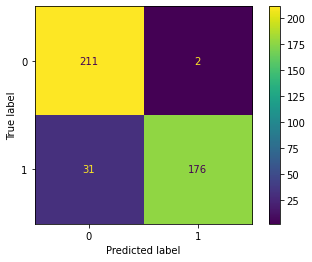

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay

lsvc.fit(xtrain, ytrain)
predicted = lsvc.predict(xtest)
matrix = confusion_matrix(ytest, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()